<h2 style='color:red' align='center'>Sport Celebrity Image Classification<h2>

Reference: https://github.com/codebasics/py/tree/master/DataScience/CelebrityFaceRecognition

In [1]:
#Import neccessary library
import numpy as np 
import pandas as pd 
import cv2
import sklearn
import matplotlib.pyplot as plt 


In [18]:
# Read test image by opencv
img = cv2.imread('./test_images/maria1.jpg')
img.shape

(555, 700, 3)

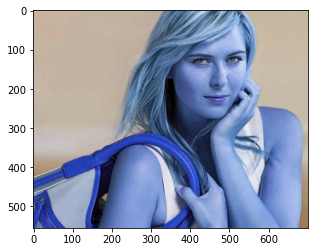

In [19]:
# Show image
plt.imshow(img)

In [20]:
# Change image color to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

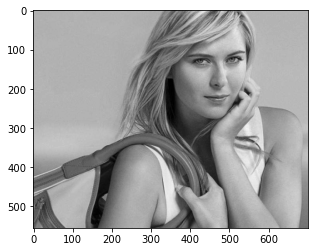

In [21]:
plt.imshow(gray,cmap='gray')

In [22]:
face_cascade  = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces =  face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [24]:
(x,y,w,h) =faces[0]
x,y,w,h

(352, 38, 233, 233)

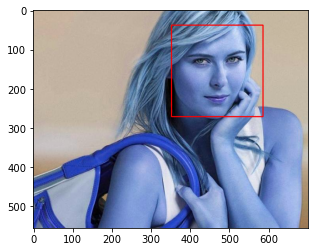

In [25]:
# Detect face and draw a rectangle around the face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

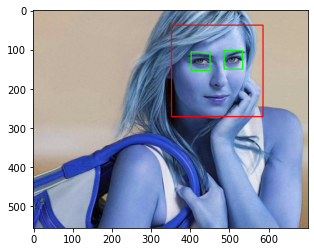

In [26]:
# Detect 2 eyes in a face
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

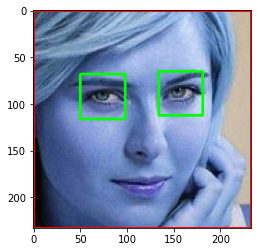

In [27]:
# Focus only on the face's area
plt.imshow(roi_color,cmap='gray')

In [28]:
# Create the function to cut the facial area if it has two eyes
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color



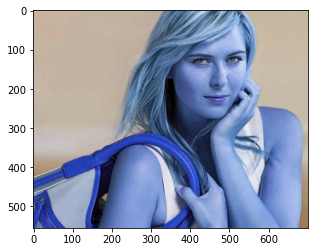

In [29]:
original_image = cv2.imread('./test_images/maria1.jpg')
plt.imshow(original_image)

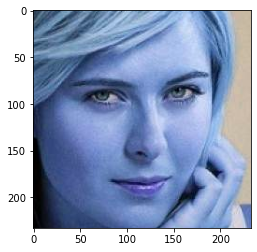

In [31]:
# Test cropped function 
cropped_image = get_cropped_image_if_2_eyes('./test_images/maria1.jpg')
plt.imshow(cropped_image)

#### There are images with unclear facses and two eyes. Those images are bad our models to detect so we will try to filter them out.

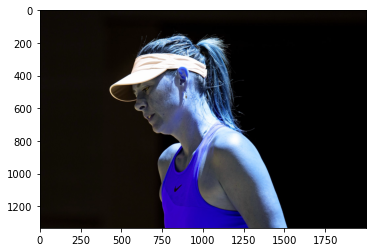

In [36]:
obstructed_image = cv2.imread('./test_images/maria2.jpg')
plt.imshow(obstructed_image)

In [37]:
# Images that do not show two eye will return None in the function get_cropped_image_if_2_eyes()
cropped_image2 = get_cropped_image_if_2_eyes('./test_images/maria2.jpg')
cropped_image2

#### We create a cropped folder that seperates cropped images from our images set 

In [39]:
path_to_data = './images_dataset/'
path_to_cr_data = './images_dataset/cropped/'

In [44]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/lebron_james',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/michael_jordan',
 './images_dataset/michael_phelps',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/tiger_wood',
 './images_dataset/tom_brady',
 './images_dataset/virat_kohli']

In [45]:
# Check if the cropped folder exists. If yes, deleter and create a new folder.
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [53]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

aset/serena_williams\serena-williams-post.jpg
./images_dataset/serena_williams\serena-williams-s-by-serena-new-york-fashion-week-spring-2020.jpg
./images_dataset/serena_williams\Serena-Williams-shot-US-Open-singles-final-September-8-2013.jpg
./images_dataset/serena_williams\Serena-Williams-t.jpg
./images_dataset/serena_williams\serena-williams-tennis-open.jpg
./images_dataset/serena_williams\serena-williams-trains-with-her-daughter-in-australia.jpg
./images_dataset/serena_williams\serena-williams-unlimited-greatness.jpg
./images_dataset/serena_williams\Serena-Williams-US-Open-2004.jpg
./images_dataset/serena_williams\serena-williams-usa-jt-201007_1601935382256_hpMain_16x9_608.jpg
./images_dataset/serena_williams\Serena-Williams-venture-firm-e1555947908193.jpg
./images_dataset/serena_williams\Serena-Williams-Writes-a-Beautiful-Letter-to-Her-Mom.jpg
./images_dataset/serena_williams\serena-williams.jpg
./images_dataset/serena_williams\serena-williams1.jpg
./images_dataset/serena_williams\

### We will manually delete images with faces not match with a specific celebrity
### After we manually delete images. We will examine the cropped_image_dirs variable again and delete any unwanted images. Basically, we reconstruct the celebrity_file_names_dict to update with the remaining valid images.

In [62]:
cropped_image_dirs =['./images_dataset/cropped/lebron_james',
'./images_dataset/cropped/lionel_messi',
'./images_dataset/cropped/maria_sharapova',
'./images_dataset/cropped/michael_jordan',
'./images_dataset/cropped/michael_phelps',
 './images_dataset/cropped/roger_federer',
 './images_dataset/cropped/serena_williams',
 './images_dataset/cropped/tiger_wood',
 './images_dataset/cropped/tom_brady',
 './images_dataset/cropped/virat_kohli']

In [63]:
cropped_image_dirs

['./images_dataset/cropped/lebron_james',
 './images_dataset/cropped/lionel_messi',
 './images_dataset/cropped/maria_sharapova',
 './images_dataset/cropped/michael_jordan',
 './images_dataset/cropped/michael_phelps',
 './images_dataset/cropped/roger_federer',
 './images_dataset/cropped/serena_williams',
 './images_dataset/cropped/tiger_wood',
 './images_dataset/cropped/tom_brady',
 './images_dataset/cropped/virat_kohli']

In [61]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir.strip()):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

james27.png',
  './images_dataset/cropped/lebron_james\\lebron_james28.png',
  './images_dataset/cropped/lebron_james\\lebron_james29.png',
  './images_dataset/cropped/lebron_james\\lebron_james3.png',
  './images_dataset/cropped/lebron_james\\lebron_james31.png',
  './images_dataset/cropped/lebron_james\\lebron_james32.png',
  './images_dataset/cropped/lebron_james\\lebron_james33.png',
  './images_dataset/cropped/lebron_james\\lebron_james34.png',
  './images_dataset/cropped/lebron_james\\lebron_james35.png',
  './images_dataset/cropped/lebron_james\\lebron_james36.png',
  './images_dataset/cropped/lebron_james\\lebron_james37.png',
  './images_dataset/cropped/lebron_james\\lebron_james38.png',
  './images_dataset/cropped/lebron_james\\lebron_james39.png',
  './images_dataset/cropped/lebron_james\\lebron_james4.png',
  './images_dataset/cropped/lebron_james\\lebron_james40.png',
  './images_dataset/cropped/lebron_james\\lebron_james41.png',
  './images_dataset/cropped/lebron_james\\l

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [64]:
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

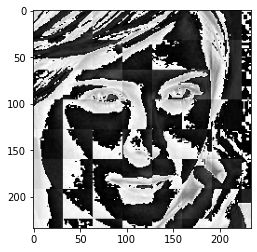

In [65]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [66]:
# Generate a classifier number for each celebrity
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lebron_james': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'michael_jordan': 3,
 'michael_phelps': 4,
 'roger_federer': 5,
 'serena_williams': 6,
 'tiger_wood': 7,
 'tom_brady': 8,
 'virat_kohli': 9}

In [67]:
X, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        print(training_image)
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

./images_dataset/cropped/lebron_james\lebron_james1.png
./images_dataset/cropped/lebron_james\lebron_james10.png
./images_dataset/cropped/lebron_james\lebron_james11.png
./images_dataset/cropped/lebron_james\lebron_james12.png
./images_dataset/cropped/lebron_james\lebron_james13.png
./images_dataset/cropped/lebron_james\lebron_james14.png
./images_dataset/cropped/lebron_james\lebron_james15.png
./images_dataset/cropped/lebron_james\lebron_james17.png
./images_dataset/cropped/lebron_james\lebron_james18.png
./images_dataset/cropped/lebron_james\lebron_james19.png
./images_dataset/cropped/lebron_james\lebron_james21.png
./images_dataset/cropped/lebron_james\lebron_james22.png
./images_dataset/cropped/lebron_james\lebron_james23.png
./images_dataset/cropped/lebron_james\lebron_james24.png
./images_dataset/cropped/lebron_james\lebron_james25.png
./images_dataset/cropped/lebron_james\lebron_james26.png
./images_dataset/cropped/lebron_james\lebron_james27.png
./images_dataset/cropped/lebron_

In [68]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(325, 4096)

In [69]:
X

array([[101.,  94.,  94., ..., 104., 157.,   3.],
       [ 10.,  10.,  10., ...,   1.,  18., 232.],
       [  0.,   2.,   2., ..., 171., 205.,   7.],
       ...,
       [250., 173., 135., ...,   9.,   4., 252.],
       [ 17.,  35.,  54., ...,  32.,  62., 199.],
       [227., 114.,  27., ..., 245.,   1.,  51.]])

In [70]:
# Dump x in a list
X.tofile('X_array.csv')

In [71]:
# # Get X_array from file and change the shape
# X_array = np.fromfile('X_array.csv')
# X_array = np.array(X_array).reshape(252,4096).astype(float)
# X_array.shape

In [72]:
len(y)

325

In [73]:
# Dump y in a list
with open('y_list.txt', 'w') as f:
    for item in y:
        f.write(f'{item} \n')

# # Get y_list from file and transfer string to int list
# y_list = []
# with open('y_list.txt') as f:
#     for line in f:
#         y_list.append(int(line.strip()))


### I'll use LazyPredict library to measure how accurate different models applying to our X and y. 

In [74]:
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
clf = LazyClassifier()
train,test = clf.fit(X_train,X_test,y_train,y_test)
train

100%|██████████| 30/30 [03:12<00:00,  6.40s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.80,0.78,None,0.77,1.40
LogisticRegression,0.78,0.75,None,0.76,1.63
LinearSVC,0.72,0.73,None,0.70,36.82
PassiveAggressiveClassifier,0.72,0.73,None,0.70,1.71
RidgeClassifierCV,0.75,0.73,None,0.73,0.32
RidgeClassifier,0.75,0.73,None,0.73,0.55
Perceptron,0.71,0.70,None,0.68,0.61
SGDClassifier,0.74,0.69,None,0.70,0.57
RandomForestClassifier,0.71,0.66,None,0.68,1.19


### It seems that LinearDiscriminantAnalysis, LogisticRegression provides the highest accuracy. I will use GridsearchCV to test more with different models and conduct hyperparameter tunning.

In [77]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis importLinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [97]:

algos = {
    'LinearSVC': {
        'model': LinearSVC(),
        'params': {
            'loss': ['hinge','squared_hinge'],
            'dual':[True,False],
            'C':[1.0,2.0,5.0,10.0]
        }
    },
    'PassiveAggressiveClassifier': {
        'model': PassiveAggressiveClassifier(),
        'params': {
            'C': [1,2,5,10],
            'loss':['hinge','squared_hinge']
        }
    },
    'RidgeClassifierCV': {
    'model': RidgeClassifierCV(),
    'params': {
        'fit_intercept' : [True,False],
        'normalize' : [True,False]
        }
    },
    'LinearDiscriminantAnalysis': {
    'model': LinearDiscriminantAnalysis(),
    'params': {
        'solver': ['svd', 'lsqr', 'eigen'],
        }
    },
    'LogisticRegression': {
    'model': LogisticRegression(),
    'params': {
        'penalty': ['l1', 'l2'],
            'C': [1,5,10,50]
        }
    }
}

In [98]:
scores = []
def find_best_model_using_gridsearchcv(X,y):  
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algos.items():
        # pipe = make_pipeline(StandardScaler(),config['model'])
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train,y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,LinearSVC,0.78,"{'C': 1.0, 'dual': False, 'loss': 'squared_hin..."
1,PassiveAggressiveClassifier,0.70,"{'C': 1, 'loss': 'squared_hinge'}"
2,RidgeClassifierCV,0.70,"{'fit_intercept': True, 'normalize': True}"
3,LinearDiscriminantAnalysis,0.69,{'solver': 'svd'}
4,LogisticRegression,0.72,"{'C': 50, 'penalty': 'l2'}"


According to the result, I will use LinearDiscriminantAnalysis with best parameters 

In [90]:
model = LinearDiscriminantAnalysis(solver='svd')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8

In [94]:
import joblib
joblib.dump(model,'model.pkl')

['save_model.pkl']

In [96]:
import json 
with open('class_dictionary.json','w') as f:
    json.dump(class_dict,f)

In [91]:
y_predicted = model.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  5,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

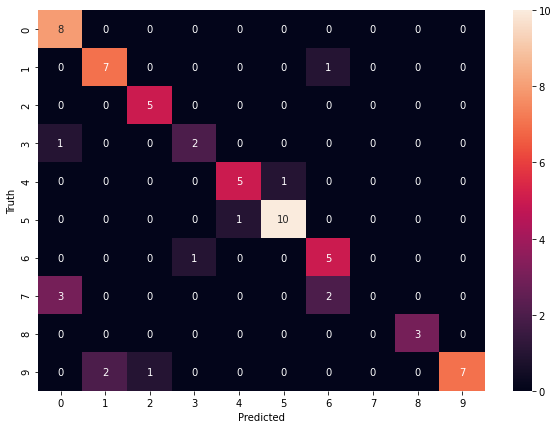

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [267]:
class_dict

{'lebron_james': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'michael_jordan': 3,
 'michael_phelps': 4,
 'roger_federer': 5,
 'serena_williams': 6,
 'tiger_wood': 7,
 'tom_brady': 8,
 'virat_kohli': 9}